In [1]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

#Loading DataSet

In [2]:
(trainX, trainy),(testX,testy) = mnist.load_data()

print('Train: X = {}, y = {}'.format(trainX.shape, trainy.shape)) 
print('Test: X = {}, y = {}'.format(testX.shape, testy.shape))

11501568/11490434 [==============================] - 0s 0us/step
Train: X = (60000, 28, 28), y = (60000,)
Test: X = (10000, 28, 28), y = (10000,)


In [3]:
print(trainX[0])


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [4]:
# trainX = trainX.reshape((train_X.shape[0],train_X.shape[1],train_X.shape[2],1))
# testX = testX.reshape((test_X.shape[0], test_X.shape[1],test_X.shape[2],1))



In [5]:
img_shape= trainX.shape[1:]
img_shape

(28, 28)

#Normalizing

In [6]:
trainX = trainX.astype('float32')/255.0
testX = testX.astype('float32')/255.0

#Ploting the numbers

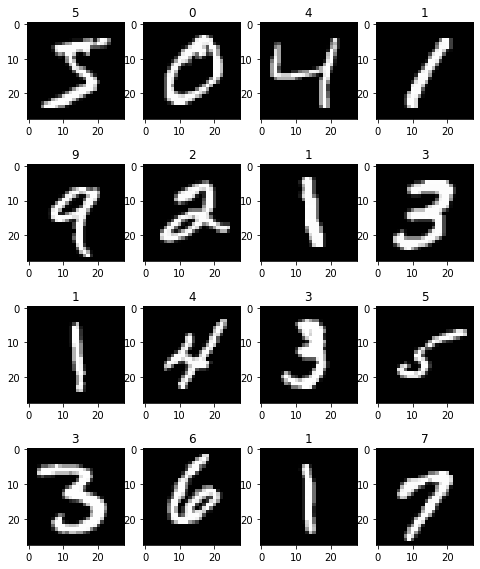

In [7]:
plt.figure(figsize= (8,10))
for i in range(16):
	plt.subplot(4,4,i+1)
	plt.imshow(trainX[i], cmap='gray')
	plt.title(trainy[i])
plt.show()

#Building the model

In [8]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape = (28,28,1)))
model.add(tf.keras.layers.MaxPool2D((2,2)))

model.add(tf.keras.layers.Conv2D(filters= 48,kernel_size=3, activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units = 500,activation= 'relu'))

model.add(tf.keras.layers.Dense(units = 10,activation= 'softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 48)          0         
                                                                 
 flatten (Flatten)           (None, 1200)              0

#Ploting the model

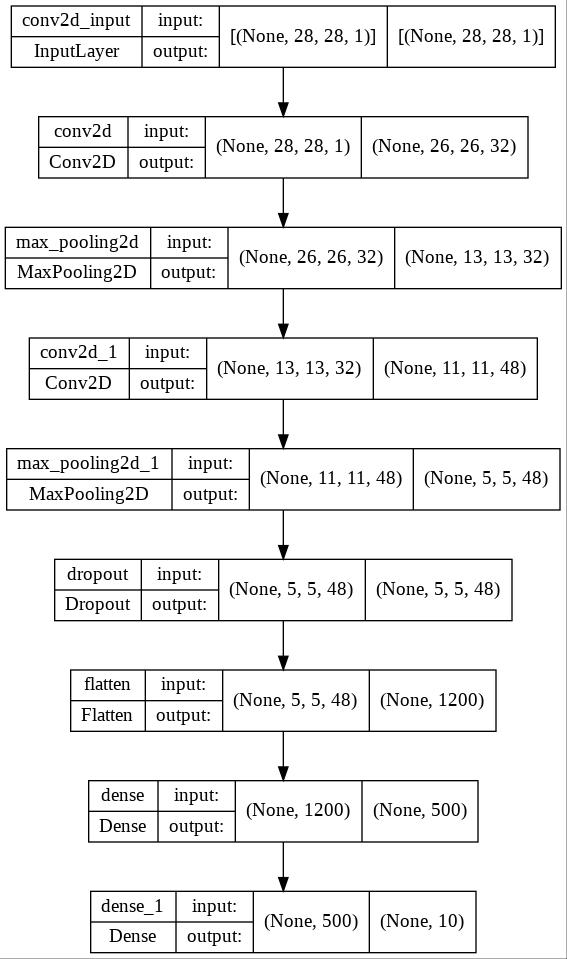

In [10]:
tf.keras.utils.plot_model(model, 'model.jpg' ,show_shapes= True )

#Compiling Model

In [11]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#Training Model

In [12]:
x =  model.fit(trainX, trainy, epochs= 10, batch_size=128, verbose=2,validation_split=0.1)
# model.fit(trainX,validation_data= testy, epochs=25)

Epoch 1/10
422/422 - 47s - loss: 0.2452 - accuracy: 0.9243 - val_loss: 0.0535 - val_accuracy: 0.9837 - 47s/epoch - 112ms/step
Epoch 2/10
422/422 - 40s - loss: 0.0812 - accuracy: 0.9746 - val_loss: 0.0380 - val_accuracy: 0.9902 - 40s/epoch - 94ms/step
Epoch 3/10
422/422 - 40s - loss: 0.0591 - accuracy: 0.9811 - val_loss: 0.0322 - val_accuracy: 0.9903 - 40s/epoch - 96ms/step
Epoch 4/10
422/422 - 39s - loss: 0.0485 - accuracy: 0.9845 - val_loss: 0.0315 - val_accuracy: 0.9907 - 39s/epoch - 93ms/step
Epoch 5/10
422/422 - 39s - loss: 0.0423 - accuracy: 0.9863 - val_loss: 0.0267 - val_accuracy: 0.9925 - 39s/epoch - 93ms/step
Epoch 6/10
422/422 - 39s - loss: 0.0358 - accuracy: 0.9884 - val_loss: 0.0304 - val_accuracy: 0.9912 - 39s/epoch - 93ms/step
Epoch 7/10
422/422 - 39s - loss: 0.0330 - accuracy: 0.9896 - val_loss: 0.0271 - val_accuracy: 0.9932 - 39s/epoch - 92ms/step
Epoch 8/10
422/422 - 39s - loss: 0.0284 - accuracy: 0.9905 - val_loss: 0.0261 - val_accuracy: 0.9923 - 39s/epoch - 92ms/step

#Evaluating Model using K-Fold

In [13]:
# def define_model(img_I):  
#   model = tf.keras.Sequential()
#   model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape = (28,28,1)))
#   model.add(tf.keras.layers.MaxPool2D((2,2)))

#   model.add(tf.keras.layers.Conv2D(filters= 48,kernel_size=3, activation = 'relu'))
#   model.add(tf.keras.layers.MaxPool2D((2,2)))

#   model.add(tf.keras.layers.Dropout(0.5))

#   model.add(tf.keras.layers.Flatten())

#   model.add(tf.keras.layers.Dense(units = 500,activation= 'relu'))

#   model.add(tf.keras.layers.Dense(units = 10,activation= 'softmax'))
#   model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#   return model

In [14]:
# from sklearn.model_selection import KFold


# def eval_data(x , y , n_k=5):
#   score =[]
#   hist = []

#   kf = KFold(n_splits=n_k,shuffle = True, random_state=1)

#   for train_kx, test_kx in kf.split(x):
#     model = define_model()
#     trainX, trainY, testX, testY = x[train_kx],y[train_kx],x[test_kx],y[test_kx]
#     history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=2)
# 		# evaluate model
#     acc = model.evaluate(testX, testY, verbose=2)
#     print('> %.3f' % (acc * 100.0))
		
#     score.append(acc)
#     hist.append(history)


In [15]:
# eval_data(trainX,trainy,5)

#Evaluating Test Set

In [16]:
loss , accuracy = model.evaluate(testX, testy)

313/313 [==============================] - 3s 11ms/step - loss: 0.0196 - accuracy: 0.9937


#Try with openCV

In [17]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# from google.colab.patches import cv2_imshow

# img = cv2.imread("/content/handwritten.png")
# print('original dims: ',img.shape)
# cv2_imshow(img)
# cv2.waitKey()
# cv2.destroyAllWindows()

In [18]:
# from numpy.core.fromnumeric import reshape
# from PIL import Image
# from skimage import img_as_ubyte    
# from skimage.color import rgb2gray
# from keras.models import load_model

# img_gray = rgb2gray(img)

In [19]:
# img_gray_u8 = img_as_ubyte(img_gray)
# im = img_gray.astype('float32')/255.

In [20]:
# (thresh, im_binary) = cv2.threshold(img_gray_u8, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

In [21]:
# img_resized = cv2.resize(im ,(28,28))
# img_resized.shape

In [22]:
# im_gray_invert = 255 - img_resized
# cv2_imshow(im_gray_invert)

In [24]:
# im_final = img_resized.reshape(1,28,28,1)

In [25]:
# im = img_gray.astype('float32')/255.0


In [26]:
# img_array = cv2.imread("/content/handwritten.png", cv2.IMREAD_GRAYSCALE)
# img_pil = Image.fromarray(img_gray)
# img_28x28 = np.array(img_pil.resize((28, 28),Image.ANTIALIAS))

# ,Image.ANTIALIAS
# img_array = (img_28x28.flatten())

# img_array  = img_array.reshape(1,28,28).T

In [27]:
# img_28x28.ndim

In [28]:
# new_im = define_model(img_resized )

#Predicting

Model Prediction is: 5


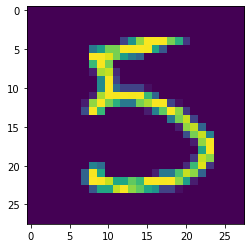

In [32]:
plt.imshow(testX[15])
pred= model.predict(testX)
print("Model Prediction is:",np.argmax(pred[15]))

Model Prediction is: 6


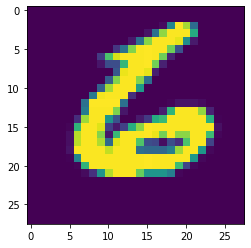

In [33]:
plt.imshow(testX[9999])
pred= model.predict(testX)
print("Model Prediction is:",np.argmax(pred[9999]))

Model Prediction is: 6


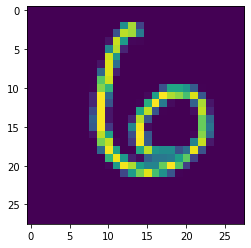

In [34]:
plt.imshow(testX[100])
pred= model.predict(testX)
print("Model Prediction is:",np.argmax(pred[100]))

Model Prediction is: 9


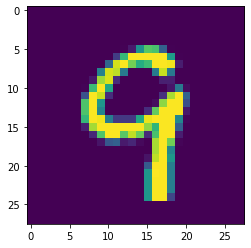

In [35]:
plt.imshow(testX[150])
pred= model.predict(testX)
print("Model Prediction is:",np.argmax(pred[150]))

Model Prediction is: 6


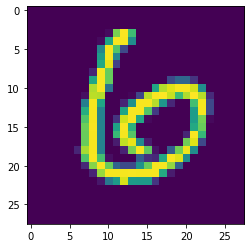

In [36]:
plt.imshow(testX[11])
pred= model.predict(testX)
print("Model Prediction is:",np.argmax(pred[11]))